Câu 1:

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print("Lý Thanh Nguyên - 6351071050\n")

# Đọc dữ liệu bank-full.csv (dấu phân cách là chấm phẩy)
df = pd.read_csv('bank-full.csv', delimiter=';')

df['y'] = df['y'].map({'yes': 1, 'no': 0})

df.info()
df.describe()

Lý Thanh Nguyên - 6351071050

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


Câu 2:

In [16]:
print("Lý Thanh Nguyên - 6351071050\n")
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Lý Thanh Nguyên - 6351071050



,Total,%
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0


Câu 3:

Lý Thanh Nguyên - 6351071050



Text(0.5, 1.0, 'Single')

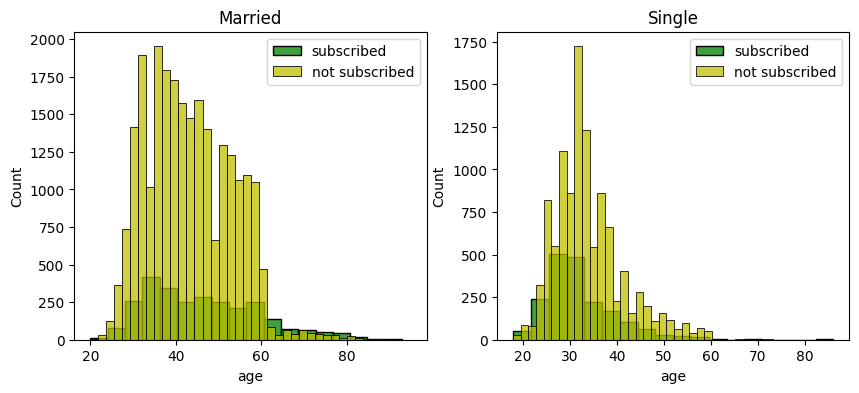

In [17]:
print("Lý Thanh Nguyên - 6351071050\n")

survived = 'subscribed'
not_survived = 'not subscribed'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

married = df[df['marital'] == 'married']
single = df[df['marital'] == 'single']

ax = sns.histplot(married[married['y'] == 1].age.dropna(), bins=18, label=survived, ax=axes[0], kde=False, color='g')
ax = sns.histplot(married[married['y'] == 0].age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False, color='y')
ax.legend()
ax.set_title("Married")

ax = sns.histplot(single[single['y'] == 1].age.dropna(), bins=18, label=survived, ax=axes[1], kde=False, color='g')
ax = sns.histplot(single[single['y'] == 0].age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False, color='y')
ax.legend()
ax.set_title("Single")

Câu 4:

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


Lý Thanh Nguyên - 6351071050



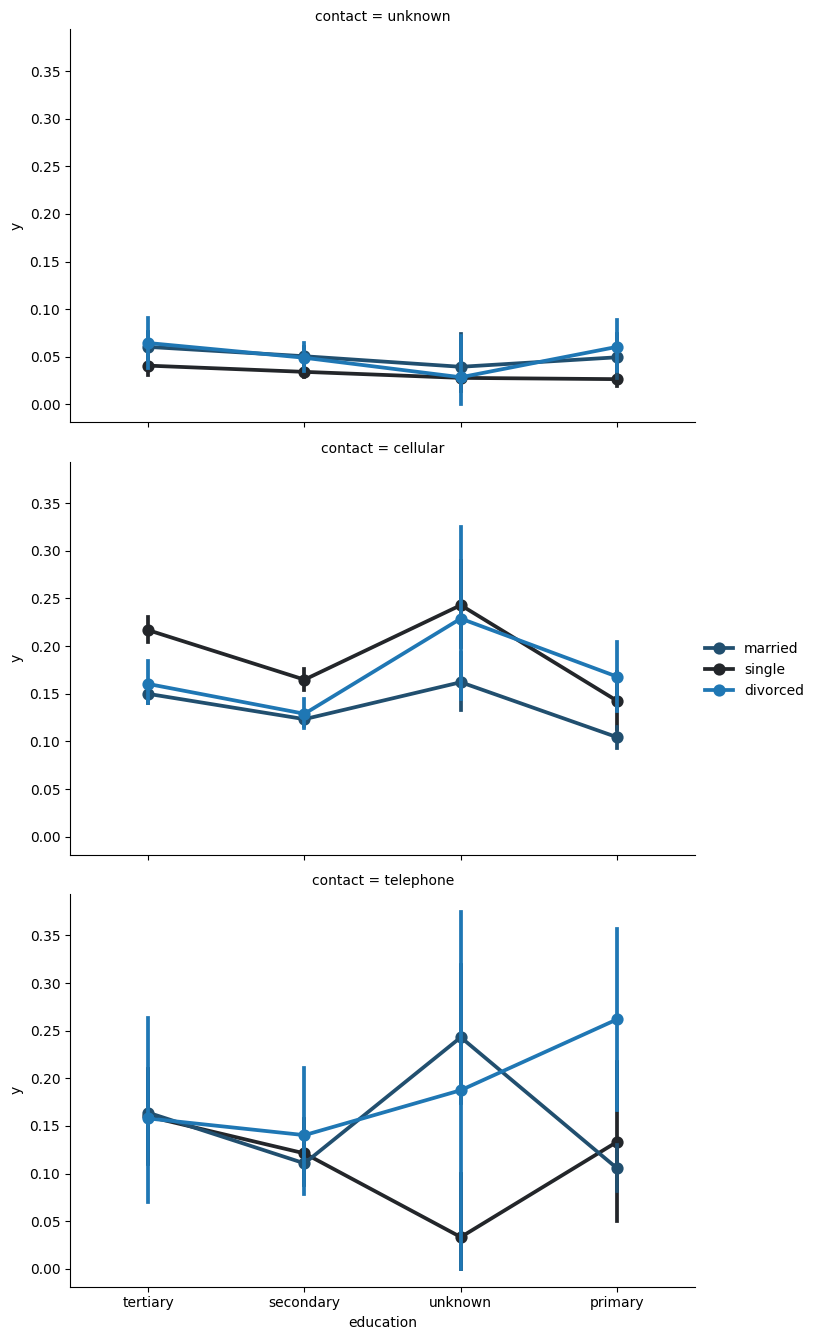

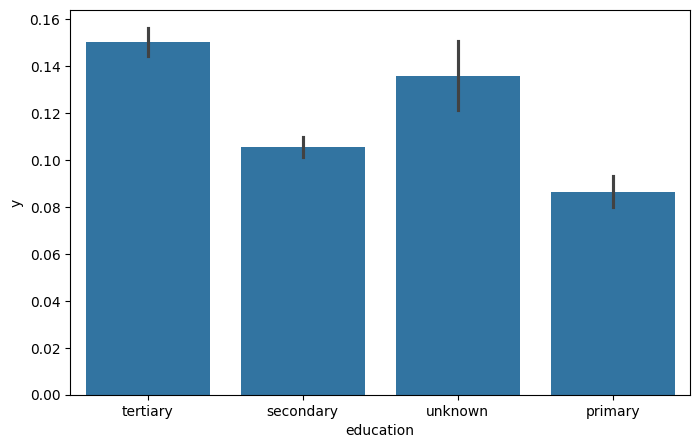

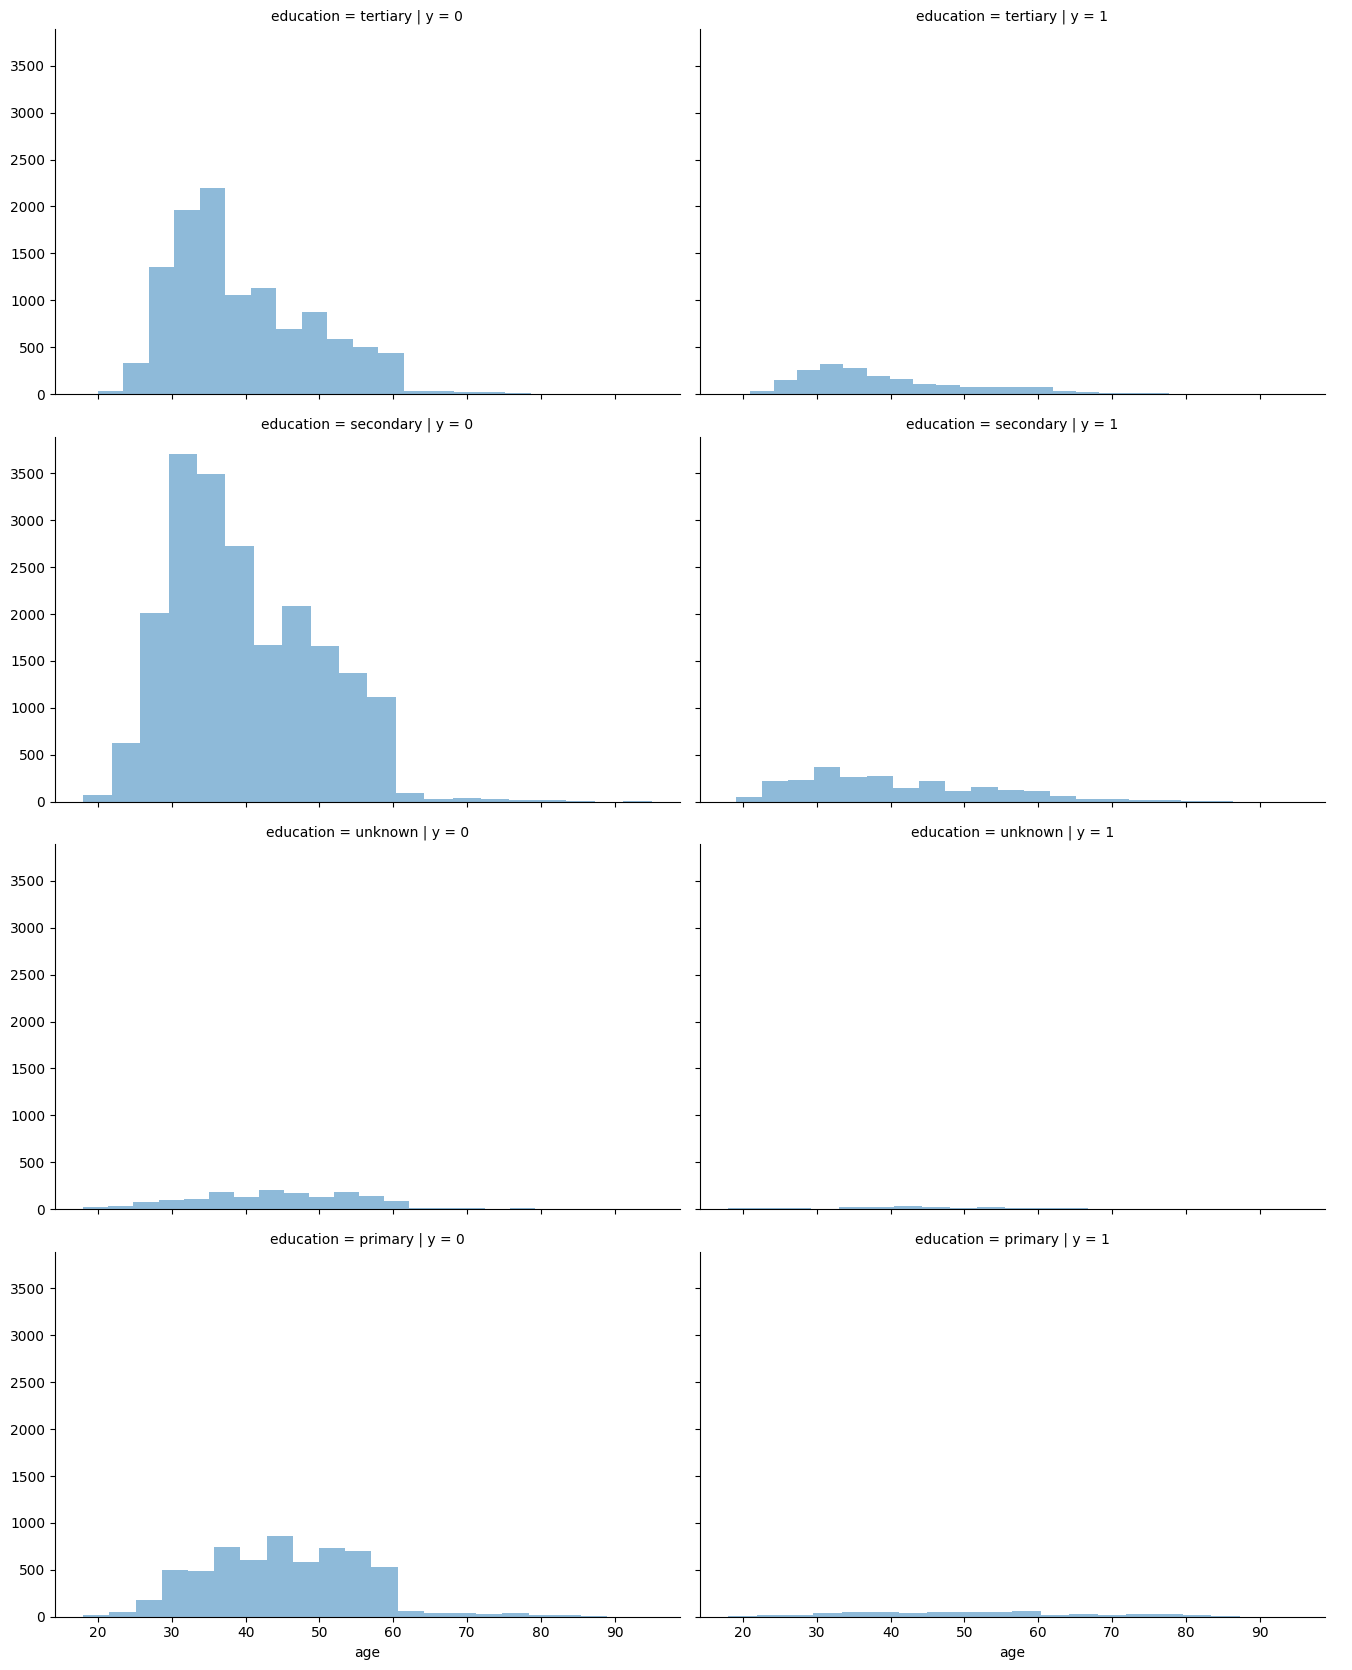

In [18]:

FacetGrid = sns.FacetGrid(df, row='contact', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'education', 'y', 'marital', palette=None, order=None, hue_order=None)
print("Lý Thanh Nguyên - 6351071050\n")
FacetGrid.add_legend()


plt.figure(figsize=(8,5))
sns.barplot(x='education', y='y', data=df)


grid = sns.FacetGrid(df, col='y', row='education', height=4.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

Câu 5:

Lý Thanh Nguyên - 6351071050



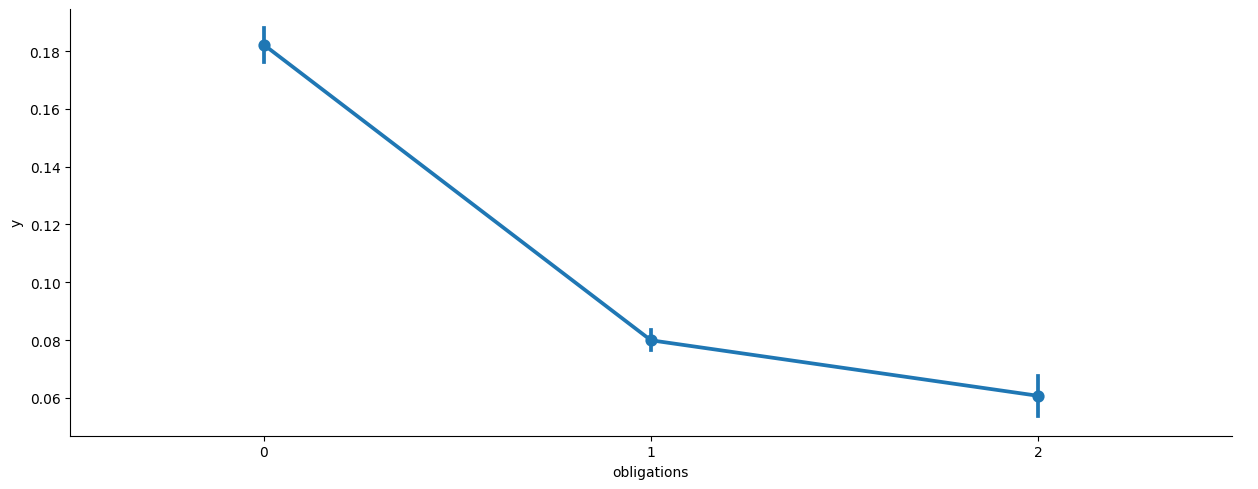

In [19]:
print("Lý Thanh Nguyên - 6351071050\n")

for dataset in [df]:
    dataset['obligations'] = (dataset['housing'] == 'yes').astype(int) + (dataset['loan'] == 'yes').astype(int)

    dataset.loc[dataset['obligations'] > 0, 'financial_freedom'] = 0
    dataset.loc[dataset['obligations'] == 0, 'financial_freedom'] = 1
    dataset['financial_freedom'] = dataset['financial_freedom'].astype(int)

df['financial_freedom'].value_counts()

# Vẽ biểu đồ
axes = sns.catplot(x='obligations', y='y', kind='point', data=df, aspect=2.5)

Câu 6:

In [20]:

print("Lý Thanh Nguyên - 6351071050\n")
df = df.drop(['day', 'month', 'poutcome'], axis=1)

for dataset in [df]:
    mean = df["age"].mean()
    std = df["age"].std()
    is_null = dataset["age"].isnull().sum()
    if is_null > 0:
        rand_age = np.random.randint(mean - std, mean + std, size=is_null)
        age_slice = dataset["age"].copy()
        age_slice[np.isnan(age_slice)] = rand_age
        dataset["age"] = age_slice
    dataset["age"] = df["age"].astype(int)

df["age"].isnull().sum()

common_value = 'cellular'
for dataset in [df]:
    dataset['contact'] = dataset['contact'].replace('unknown', common_value)

Lý Thanh Nguyên - 6351071050



Câu 7:

In [21]:
print("Lý Thanh Nguyên - 6351071050\n")
df.info()

education_mapping = {"primary": 1, "secondary": 2, "tertiary": 3, "unknown": 0}
for dataset in [df]:
    dataset['education'] = dataset['education'].map(education_mapping)

marital_mapping = {"married": 0, "single": 1, "divorced": 2}
for dataset in [df]:
    dataset['marital'] = dataset['marital'].map(marital_mapping)

contact_mapping = {"cellular": 0, "telephone": 1}
for dataset in [df]:
    dataset['contact'] = dataset['contact'].map(contact_mapping)

for dataset in [df]:
    dataset.loc[ dataset['age'] <= 30, 'age'] = 0
    dataset.loc[(dataset['age'] > 30) & (dataset['age'] <= 40), 'age'] = 1
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 50), 'age'] = 2
    dataset.loc[(dataset['age'] > 50) & (dataset['age'] <= 60), 'age'] = 3
    dataset.loc[ dataset['age'] > 60, 'age'] = 4
    dataset['age'] = dataset['age'].astype(int)

df['age'].value_counts()

Lý Thanh Nguyên - 6351071050

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   job                45211 non-null  object
 2   marital            45211 non-null  object
 3   education          45211 non-null  object
 4   default            45211 non-null  object
 5   balance            45211 non-null  int64 
 6   housing            45211 non-null  object
 7   loan               45211 non-null  object
 8   contact            45211 non-null  object
 9   duration           45211 non-null  int64 
 10  campaign           45211 non-null  int64 
 11  pdays              45211 non-null  int64 
 12  previous           45211 non-null  int64 
 13  y                  45211 non-null  int64 
 14  obligations        45211 non-null  int64 
 15  financial_freedom  45211 non-null  int64 
dtypes: int64(9

,count
age,
1,17687
2,11239
3,8067
0,7030
4,1188


Câu 8:

In [22]:

for dataset in [df]:
    dataset.loc[ dataset['balance'] <= 0, 'balance'] = 0
    dataset.loc[(dataset['balance'] > 0) & (dataset['balance'] <= 1000), 'balance'] = 1
    dataset.loc[(dataset['balance'] > 1000) & (dataset['balance'] <= 5000), 'balance'] = 2
    dataset.loc[ dataset['balance'] > 5000, 'balance'] = 3
    dataset['balance'] = dataset['balance'].astype(int)

for dataset in [df]:
    dataset['age_education'] = dataset['age'] * dataset['education']

print("Lý Thanh Nguyên - 6351071050\n")
df.head(10)

Lý Thanh Nguyên - 6351071050



,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y,obligations,financial_freedom,age_education
0,3,management,0,3,no,2,yes,no,0,261,1,-1,0,0,1,0,9
1,2,technician,1,2,no,1,yes,no,0,151,1,-1,0,0,1,0,4
2,1,entrepreneur,0,2,no,1,yes,yes,0,76,1,-1,0,0,2,0,2
3,2,blue-collar,0,0,no,2,yes,no,0,92,1,-1,0,0,1,0,0
4,1,unknown,1,0,no,1,no,no,0,198,1,-1,0,0,0,1,0
5,1,management,0,3,no,1,yes,no,0,139,1,-1,0,0,1,0,3
6,0,management,1,3,no,1,yes,yes,0,217,1,-1,0,0,2,0,0
7,2,entrepreneur,2,3,yes,1,yes,no,0,380,1,-1,0,0,1,0,6
8,3,retired,0,1,no,1,yes,no,0,50,1,-1,0,0,1,0,3
9,2,technician,1,2,no,1,yes,no,0,55,1,-1,0,0,1,0,4
